In [24]:
import os

# Importing GemPy
import gempy as gp

# Importing auxiliary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [25]:
data_path = '../Data/'
path_interf = data_path + "model_points_unds_cln.csv"
path_orient = data_path + "model_orientations_unds.csv"
path_dem = data_path + 'DemCropped.tif'

In [26]:
resolution = [100,100,100]
extent = np.array([1104356.0,1105376.0,1282170.0,1283170.0,500.0,900.0])
geo_model = gp.create_model('NorthModel2')
gp.init_data(geo_model,
            extent=extent,
            resolution=resolution,
            path_i=path_interf,
            path_o=path_orient)

Active grids: ['regular']


C:\Users\57318\Anaconda3\envs\gempy\lib\site-packages\gempy\core\data_modules\geometric_data.py:537: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


NorthModel2  2021-07-08 13:56

In [27]:
gp.map_stack_to_surfaces(geo_model, {
    'transversal_fault':'Fault1',
    'antithetic_fault':'Fault2',
    's_fault':'Fault3',
    'olas_fault':'Fault4',
    'stratigraphic_series':('Suelo',
                           'Qd',
                           'QmBO2',
                           'QmBO1',
                            'fm_tiburon',
                            'fm_bocas',
                            'fm_diamante'
                           ),
    'basement_series':'basement'
})

,surface,series,order_surfaces,color,id
7,Fault1,transversal_fault,1,#4878d0,1
8,Fault2,antithetic_fault,1,#ee854a,2
9,Fault3,s_fault,1,#6acc64,3
10,Fault4,olas_fault,1,#d65f5f,4
0,Suelo,stratigraphic_series,1,#015482,5
1,Qd,stratigraphic_series,2,#9f0052,6
2,QmBO2,stratigraphic_series,3,#ffbe00,7
3,QmBO1,stratigraphic_series,4,#728f02,8
4,fm_bocas,stratigraphic_series,5,#443988,9
5,fm_tiburon,stratigraphic_series,6,#ff3f20,10


C:\Users\57318\Anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


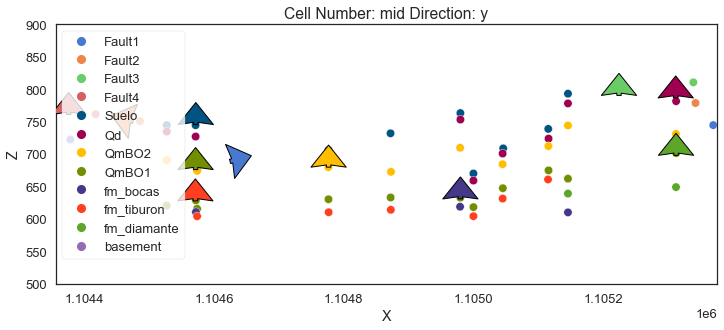

In [28]:
a = gp.plot_2d(geo_model, direction='y')

In [29]:
geo_model.set_is_fault(['antithetic_fault',
                       'transversal_fault',
                       's_fault',
                       'olas_fault'], change_color=True)

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
transversal_fault,1,Fault,True,True,False
antithetic_fault,2,Fault,True,True,False
s_fault,3,Fault,True,True,False
olas_fault,4,Fault,True,True,False
stratigraphic_series,5,Erosion,True,False,False
basement_series,6,Erosion,False,False,False


In [30]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
transversal_fault,1,Fault,True,True,False
antithetic_fault,2,Fault,True,True,False
s_fault,3,Fault,True,True,False
olas_fault,4,Fault,True,True,False
stratigraphic_series,5,Erosion,True,False,False
basement_series,6,Erosion,False,False,False


In [31]:
order_series = ["antithetic_fault",
               "transversal_fault",
               "s_fault",
               "olas_fault",
               "stratigraphic_series",
               "basement_series"]

geo_model.reorder_series(order_series)

,order_series,BottomRelation,isActive,isFault,isFinite
antithetic_fault,1,Fault,True,True,False
transversal_fault,2,Fault,True,True,False
s_fault,3,Fault,True,True,False
olas_fault,4,Fault,True,True,False
stratigraphic_series,5,Erosion,True,False,False
basement_series,6,Erosion,False,False,False


In [32]:
geo_model.faults
geo_model.set_is_finite_fault('antithetic_fault')

,order_series,BottomRelation,isActive,isFault,isFinite
antithetic_fault,1,Fault,True,True,True
transversal_fault,2,Fault,True,True,False
s_fault,3,Fault,True,True,False
olas_fault,4,Fault,True,True,False
stratigraphic_series,5,Erosion,True,False,False
basement_series,6,Erosion,False,False,False


In [33]:
geo_model.faults.faults_relations_df


,antithetic_fault,transversal_fault,s_fault,olas_fault,stratigraphic_series,basement_series
antithetic_fault,False,False,False,False,True,True
transversal_fault,False,False,False,False,True,True
s_fault,False,False,False,False,True,True
olas_fault,False,False,False,False,True,True
stratigraphic_series,False,False,False,False,False,False
basement_series,False,False,False,False,False,False


In [34]:
fr = geo_model.faults.faults_relations_df.values

fr[0:2,2:4] = True
fr

array([[False, False,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [35]:
gp.plot_3d(geo_model)

In [36]:
gp.set_interpolator(geo_model,
                   compile_theano=True,
                   theano_optimizer='fast_run')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  4
Compilation Done!
Kriging values: 
                              values
range                   1483.374531
$C_o$                   52390.47619
drift equations  [3, 3, 3, 3, 3, 3]


Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


C:\Users\57318\Anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


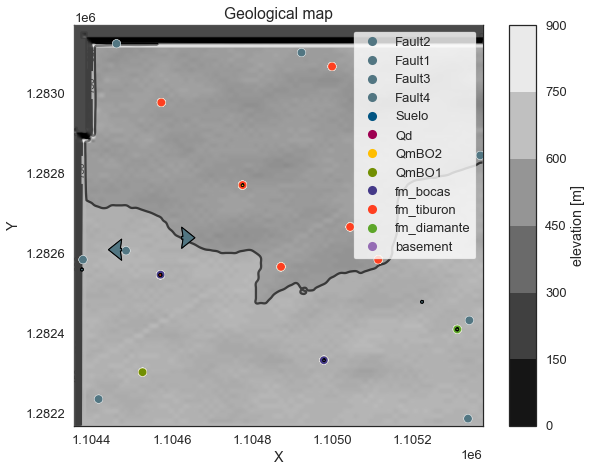

In [37]:
geo_model.set_topography(source='gdal',filepath=path_dem)
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_lith=False,
           show_boundaries=False,
           kwargs_topography={'cmap': 'gray', 'norm': None}
           )
plt.show()

In [38]:
gp.compute_model(geo_model)

C:\Users\57318\Anaconda3\envs\gempy\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.46017e-29): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\57318\Anaconda3\envs\gempy\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.19325e-20): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\57318\Anaconda3\envs\gempy\lib\site-packages\gempy\core\solution.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [values[0][:, l0: l1], values[4][:, l0: l1].astype(float)])



Lithology ids 
  [12. 12. 12. ...  5.  5.  5.] 

In [41]:
gp.plot_3d(geo_model)